In [1]:
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.data import morningstar as ms
from quantopian.pipeline.data import Fundamentals
from quantopian.pipeline.filters import QTradableStocksUS
from quantopian.pipeline.factors import DailyReturns
import pandas as pd
import numpy as np
# for graphing
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# create a custom list of tickers that represent cloud Saas stocks
# NET and DDOG have no data in Morningstar db
cloud = '''SHOP MDB PAYC TWOU AYX BL ZS WIX MIME DOMO CARB QLYS PLAN INST APPF TEAM 
DOCU NOW WK CSOD JCOM PS PD CRWD QTWO FIVN TWLO EVBG TENB RNG YEXT ZUO ADBE PFPT WDAY 
OKTA ZEN AVLR COUP ZM NEWR RP RPD VEEV LOGM PCTY CRM BOX ESTC CLDR HUBS DT WORK 
SMAR DBX MDLA'''
syms = Fundamentals.symbol.latest.element_of(cloud.split())

In [3]:
# confirm that list worked
cloud_list = cloud.split()
", ".join(cloud_list)

'SHOP, MDB, PAYC, TWOU, AYX, BL, ZS, WIX, MIME, DOMO, CARB, QLYS, PLAN, INST, APPF, TEAM, DOCU, NOW, WK, CSOD, JCOM, PS, PD, CRWD, QTWO, FIVN, TWLO, EVBG, TENB, RNG, YEXT, ZUO, ADBE, PFPT, WDAY, OKTA, ZEN, AVLR, COUP, ZM, NEWR, RP, RPD, VEEV, LOGM, PCTY, CRM, BOX, ESTC, CLDR, HUBS, DT, WORK, SMAR, DBX, MDLA'

In [4]:
len(cloud_list)   # Number of tickers in list

56

In [5]:
# Create a pipeline to generate the data
def make_pipeline():
    rev = Fundamentals.total_revenue.latest
    tic = Fundamentals.primary_symbol.latest
    name = Fundamentals.short_name.latest
    
    # valuation
    ent_val = Fundamentals.enterprise_value.latest
    mkt_val = Fundamentals.market_cap.latest
    rev_rr = (rev * 4)
    entval_rev = ent_val / rev_rr
    
    # income statement
    gm = Fundamentals.gross_margin.latest
    g_a = Fundamentals.general_and_administrative_expense.latest
    s_m = Fundamentals.selling_and_marketing_expense.latest
    r_d = Fundamentals.research_and_development.latest
    op_inc = Fundamentals.operating_income.latest
    # cash flow
    cfo = Fundamentals.cash_flow_from_continuing_operating_activities.latest
    
    # growth
    rev_grth = Fundamentals.revenue_growth.latest
    s_emp = Fundamentals.sales_per_employee.latest
    
    fcf = Fundamentals.free_cash_flow.latest
    # screening universe
    #universe = QTradableStocksUS() & ind_grp
    
    return Pipeline(
        columns = {
            'name': name,
            'tic': tic,
            'mkt_val': mkt_val,
            'rev': rev,
            'ev_rev': entval_rev,
            'rev_rr': rev_rr,
             # income statement
            'gm': gm,
            'g_a': g_a / rev,
            's_m': s_m / rev,
            'r_d': r_d / rev,
            'op_mgn': op_inc / rev,
            # cash flow
            'cfo_mgn': cfo/rev,
            
            'fcf_mgn': fcf / rev,
            # growth
            'rev_grth': rev_grth,
            's_emp': s_emp,
        },
        screen = syms #universe
    )

In [6]:
# load pipeline into dataframe called results
results = run_pipeline(make_pipeline(), '2019-11-12', '2019-11-12')

In [8]:
# look at data on November 12, 2019
results.dropna().describe()

,cfo_mgn,ev_rev,fcf_mgn,g_a,gm,mkt_val,op_mgn,r_d,rev,rev_grth,rev_rr,s_emp,s_m
count,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000,55.000000,5.500000e+01,55.000000,5.500000e+01,55.000000,55.000000
mean,0.060471,11.051691,-0.003727,0.194238,0.723585,1.309874e+10,-0.198084,0.264538,2.954920e+08,0.369401,1.181968e+09,76826.427281,0.454039
std,0.363177,6.161052,0.362746,0.126867,0.088371,2.682158e+10,0.408630,0.193777,6.435907e+08,0.196372,2.574363e+09,26012.541901,0.170360
min,-1.950834,2.534679,-1.995958,0.077363,0.484172,4.571319e+08,-2.508398,0.037025,3.731400e+07,0.025941,1.492560e+08,37517.076923,0.168830
25%,-0.034398,6.203403,-0.102929,0.138711,0.694922,2.731727e+09,-0.315658,0.174059,8.415450e+07,0.247469,3.366180e+08,59158.683397,0.309839
50%,0.065892,10.113365,0.036519,0.162118,0.724637,5.616939e+09,-0.137986,0.234077,1.293780e+08,0.321610,5.175120e+08,72300.566135,0.456342
75%,0.208326,14.649777,0.126536,0.208947,0.789247,1.069563e+10,0.002730,0.300639,2.212685e+08,0.473565,8.850740e+08,86974.702383,0.562899
max,1.202780,30.869546,1.166328,0.850889,0.906719,1.418811e+11,0.301261,1.502135,3.997000e+09,0.956713,1.598800e+10,184330.606974,0.940810


In [9]:
# create the time series of data and load into dataframe called corr
corr = run_pipeline(make_pipeline(), '2017-01-03', '2019-11-12')

In [10]:
# Make sure top of data is what we want
corr.head(2)

cfo_mgn    ev_rev   fcf_mgn  \
2017-01-03 00:00:00+00:00 Equity(114 [ADBE])    0.249830  8.260849  0.316040   
                          Equity(22450 [JCOM])  0.113218  5.003222  0.247616   

                                                     g_a        gm  \
2017-01-03 00:00:00+00:00 Equity(114 [ADBE])    0.098159  0.861540   
                          Equity(22450 [JCOM])  0.264673  0.823945   

                                                     mkt_val           name  \
2017-01-03 00:00:00+00:00 Equity(114 [ADBE])    5.090425e+10  Adobe Systems   
                          Equity(22450 [JCOM])  3.931036e+09      j2 Global   

                                                  op_mgn       r_d  \
2017-01-03 00:00:00+00:00 Equity(114 [ADBE])    0.252277  0.169710   
                          Equity(22450 [JCOM])  0.295656  0.042667   

                                                         rev  rev_grth  \
2017-01-03 00:00:00+00:00 Equity(114 [ADBE])    1.463967e+09  0.202172   
                          Equity(22450 [JCOM])  2.101160e+08  0.175796   

                                                      rev_rr          s_emp  \
2017-01-03 00:00:00+00:00 Equity(114 [ADBE])    5.855868e+09  105374.433168   
                          Equity(22450 [JCOM])  8.404640e+08  130669.154229   

                                                     s_m   tic  
2017-01-03 00:00:00+00:00 Equity(114 [ADBE])    0.326151  ADBE  
                          Equity(22450 [JCOM])  0.220949  JCOM

In [11]:
# create a new dataframe from corr to look at the relationship between revenue growth and 
dates = corr.reset_index().index.values
new_c = pd.DataFrame({#'date':dates,
                      's_m': corr['s_m'].values,
                      'cfo_mgn': corr['cfo_mgn'].values,
                      'rev_grth': corr['rev_grth'].values,
                      'op_inc_mgn': corr['op_mgn'].values,
                      'r_d': corr['r_d'].values,
                      'gm': corr['gm'].values,
                      'mkt_val': corr['mkt_val'].values,
                      's_emp': corr['s_emp'].values
                     })
#new_cs.drop('date',axis=1,inplace=True)
new_cs = new_c.drop_duplicates(subset=['s_m',#'cfo_mgn','rev_grth','op_inc_mgn','r_d','gm','mkt_val','s_emp'
                                      ],
                              keep = 'first').sort_values(by='s_m',ascending=False).dropna()
new_cs.head()

,cfo_mgn,gm,mkt_val,op_inc_mgn,r_d,rev_grth,s_emp,s_m
14606,-1.154703,0.637940,5.926529e+08,-1.345594,0.596776,0.317537,40131.909548,1.241384
13915,0.096221,0.625860,9.323086e+09,-1.717229,0.454855,0.372782,69094.456763,1.226413
17086,-1.053375,0.634692,5.788932e+08,-1.265912,0.610471,0.322897,43048.994975,0.992267
29679,0.002214,0.785436,1.489725e+10,-2.508398,1.502135,0.575485,78026.372443,0.940810
26486,-0.653905,0.686161,7.858431e+08,-0.810603,0.419114,0.277133,53611.038108,0.881146


In [12]:
new_cs.describe()

,cfo_mgn,gm,mkt_val,op_inc_mgn,r_d,rev_grth,s_emp,s_m
count,370.000000,370.000000,3.700000e+02,370.000000,370.000000,370.000000,370.000000,370.000000
mean,0.109905,0.724007,1.295460e+10,-0.123530,0.234282,0.351531,76091.907837,0.434354
std,0.260560,0.093197,2.509298e+10,0.303157,0.129002,0.178968,26855.746306,0.166384
min,-1.950834,0.472513,4.829865e+08,-2.508398,0.032451,0.024257,35315.964912,0.161410
25%,0.006101,0.693421,2.572790e+09,-0.244859,0.155560,0.248058,57356.217666,0.292622
50%,0.113253,0.727329,4.214464e+09,-0.114624,0.211116,0.321526,70755.633575,0.445827
75%,0.242150,0.785906,8.548520e+09,0.011769,0.276803,0.403648,87830.427928,0.538950
max,1.202780,0.938811,1.423452e+11,1.725155,1.502135,1.844770,193918.191604,1.241384


In [14]:
# clean up data by removing outliers in columns - keep those within 2 std
#new_new=new_cs[np.abs(new_cs.cfo-new_cs.cfo.mean()) <= (2*new_cs.cfo.std())]
# 2 standard deviation to include 95% of data
from scipy import stats
new_new = new_cs[(np.abs(stats.zscore(new_cs)) < 2).all(axis=1)].sort_index()
new_new.head()

,cfo_mgn,gm,mkt_val,op_inc_mgn,r_d,rev_grth,s_emp,s_m
0,0.249830,0.861540,5.090425e+10,0.252277,0.169710,0.202172,105374.433168,0.326151
2,0.007983,0.727001,4.769608e+10,0.001416,0.145218,0.252813,112882.894737,0.465314
476,0.227393,0.865361,5.482789e+10,0.293630,0.160312,0.231180,102407.933274,0.307782
1429,0.094462,0.840254,3.965502e+09,0.270655,0.043207,0.229535,103807.502061,0.253005
1498,0.007463,0.727132,5.870128e+10,-0.010177,0.150041,0.267818,91759.520000,0.474825


In [15]:
new_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 32230
Data columns (total 8 columns):
cfo_mgn       287 non-null float64
gm            287 non-null float64
mkt_val       287 non-null float64
op_inc_mgn    287 non-null float64
r_d           287 non-null float64
rev_grth      287 non-null float64
s_emp         287 non-null float64
s_m           287 non-null float64
dtypes: float64(8)
memory usage: 20.2 KB


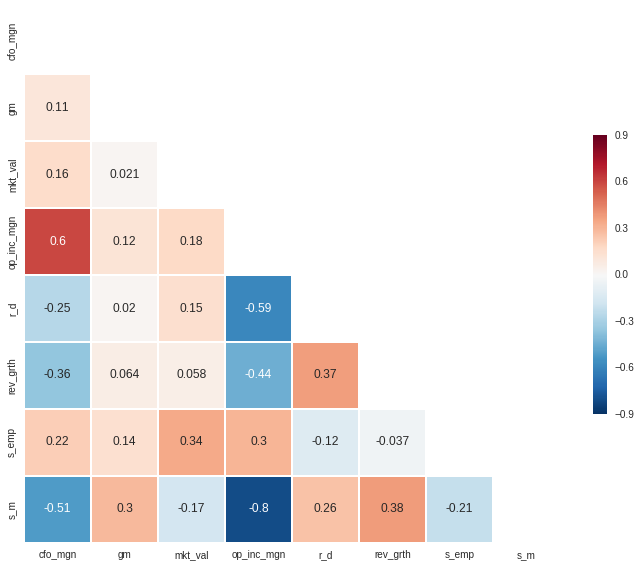

In [16]:
# look at correlations
correlat = new_new.corr()
masking = np.zeros_like(correlat, dtype=np.bool)
masking[np.triu_indices_from(masking)] = True
f, ax = plt.subplots(figsize=(12, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlat, mask=masking, #cmap=cmap,
            vmax=.9, center=0, square=True, linewidths=.5,
            annot=True,cbar_kws={'shrink': .5});

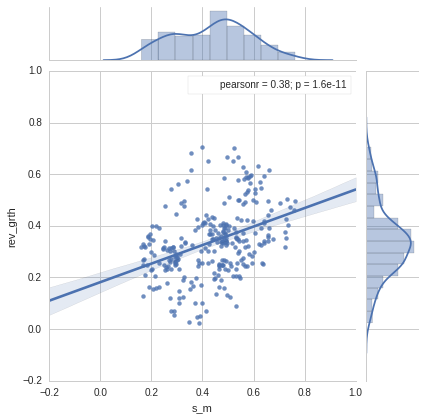

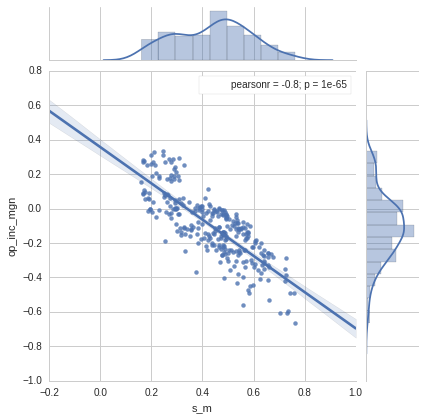

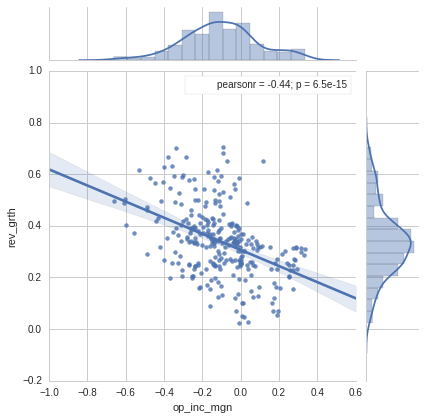

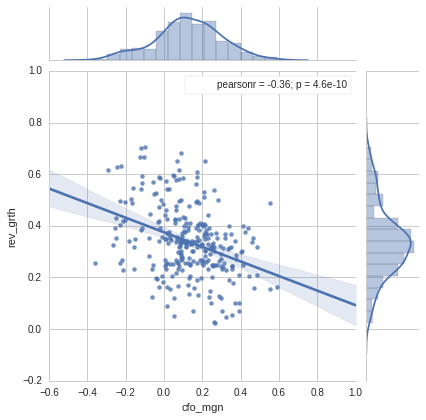

In [22]:
# Examine the relationship between select metrics
sns.jointplot(new_new['s_m'],new_new['rev_grth'],kind='reg') # expect positive correl
sns.jointplot(new_new['s_m'],new_new['op_inc_mgn'],kind='reg')# expect neg correl
sns.jointplot(new_new['op_inc_mgn'],new_new['rev_grth'],kind='reg') #expect neg correl
#sns.jointplot(new_new['cfo_mgn'],new_new['s_m'],kind='reg')
sns.jointplot(new_new['cfo_mgn'],new_new['rev_grth'],kind='reg')#expect neg correl

In [23]:
# create a copy of dataframe to look at metric trends
trend = corr.copy()

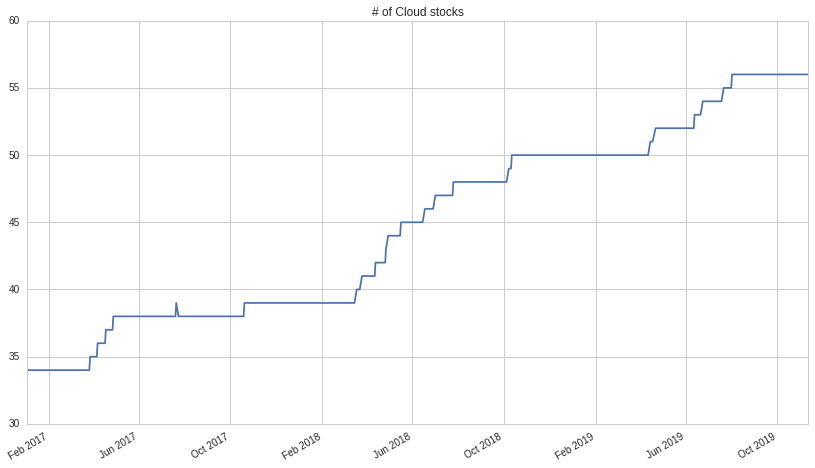

In [24]:
# how many tickers over time
trend.groupby(level=0).size().plot(title='# of Cloud stocks', ylim=(30,60))

Create separate Series objects for each benchmark study variable
1. Rev Growth
2. Gross Margin
3. S&M margin
4. R&D margin
5. G&A margin
6. Op margin
7. CFO margin
8. FCF margin

In [25]:
trend.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 32258 entries, (2017-01-03 00:00:00+00:00, Equity(114 [ADBE])) to (2019-11-12 00:00:00+00:00, Equity(53403 [DT]))
Data columns (total 15 columns):
cfo_mgn     22036 non-null float64
ev_rev      31772 non-null float64
fcf_mgn     31772 non-null float64
g_a         31772 non-null float64
gm          31770 non-null float64
mkt_val     32249 non-null float64
name        32258 non-null category
op_mgn      31772 non-null float64
r_d         31398 non-null float64
rev         31772 non-null float64
rev_grth    31771 non-null float64
rev_rr      31772 non-null float64
s_emp       31771 non-null float64
s_m         31772 non-null float64
tic         32258 non-null category
dtypes: category(2), float64(13)
memory usage: 3.7+ MB


In [26]:
# create a pipeline for dates
def make_pipeline():
    return Pipeline(columns = {'returns_1d': DailyReturns()},
                    screen = syms & DailyReturns().notnull()
                   )
s_returns = run_pipeline(make_pipeline(), '2017-01-03', '2019-11-12')

In [27]:
# transform data to eliminate multi-index
tf = trend.reset_index().copy()
tf.drop(['level_1'],axis=1,inplace=True)
tf.rename(columns={'level_0':'date'},inplace=True)
# set date as index
tf.set_index(['date'])
tf.head()

,date,cfo_mgn,ev_rev,fcf_mgn,g_a,gm,mkt_val,name,op_mgn,r_d,rev,rev_grth,rev_rr,s_emp,s_m,tic
0,2017-01-03 00:00:00+00:00,0.249830,8.260849,0.316040,0.098159,0.861540,5.090425e+10,Adobe Systems,0.252277,0.169710,1.463967e+09,0.202172,5.855868e+09,105374.433168,0.326151,ADBE
1,2017-01-03 00:00:00+00:00,0.113218,5.003222,0.247616,0.264673,0.823945,3.931036e+09,j2 Global,0.295656,0.042667,2.101160e+08,0.175796,8.404640e+08,130669.154229,0.220949,JCOM
2,2017-01-03 00:00:00+00:00,0.007983,5.655654,0.006369,0.115054,0.727001,4.769608e+10,Salesforce.com,0.001416,0.145218,2.144775e+09,0.252813,8.579100e+09,112882.894737,0.465314,CRM
3,2017-01-03 00:00:00+00:00,NaN,6.719332,0.187502,0.219663,0.865046,2.467050e+09,LogMeIn,-0.002679,0.166398,8.510300e+07,0.223219,3.404120e+08,76738.503156,0.465648,LOGM
4,2017-01-03 00:00:00+00:00,NaN,4.169999,0.148721,0.146511,0.566686,2.414124e+09,RealPage,0.059572,0.126680,1.479550e+08,0.216855,5.918200e+08,33626.136364,0.228853,RP


In [28]:
# create time series of each metric
rev = tf.groupby('date')['rev_grth'].median()
gm = tf.groupby('date')['gm'].median()
s_m = tf.groupby('date')['s_m'].median()
r_d = tf.groupby('date')['r_d'].median()
g_a = tf.groupby('date')['g_a'].median()
op_inc = tf.groupby('date')['op_mgn'].median()
cfo = tf.groupby('date')['cfo_mgn'].median()
fcf = tf.groupby('date')['fcf_mgn'].median()

In [29]:
# load data into a list
data = [rev,gm,s_m,r_d,g_a,op_inc,cfo,fcf]

In [30]:
# date
type(rev.index.values)

<type 'numpy.ndarray'>

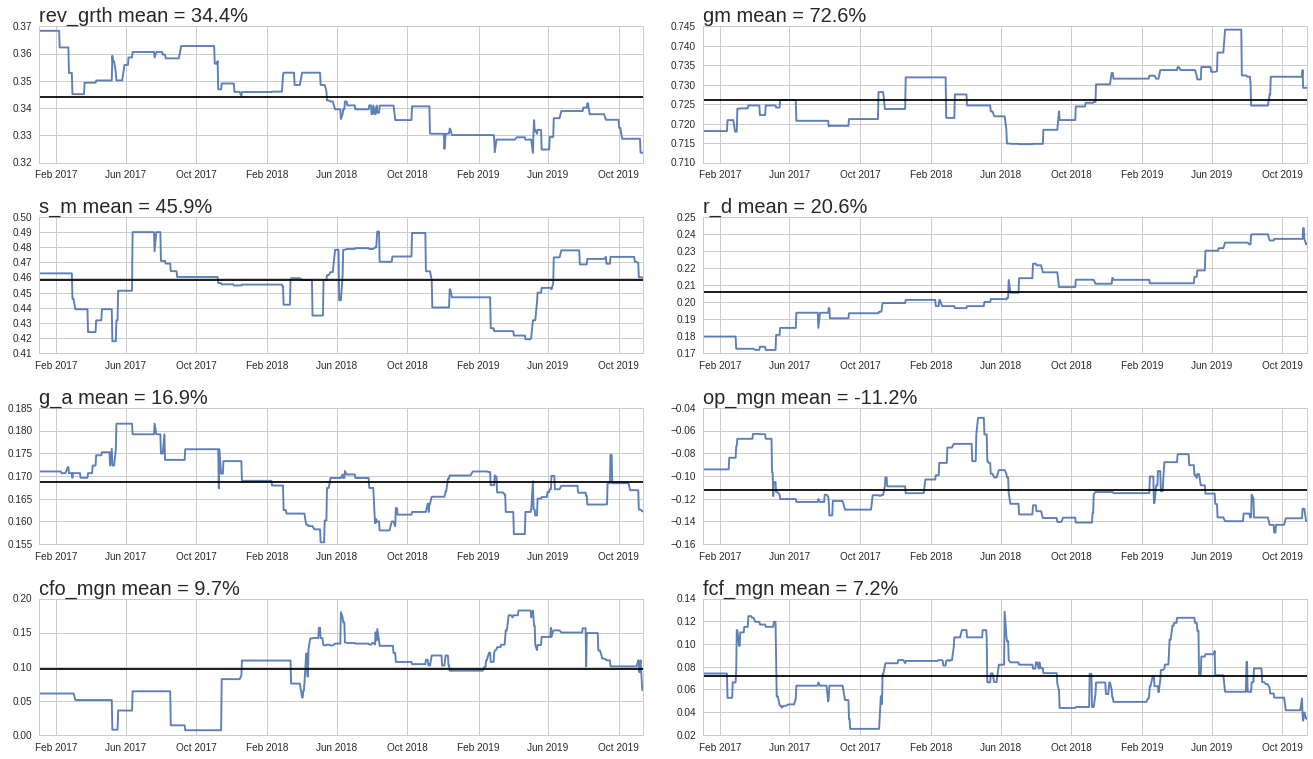

In [31]:
# create charts of metrics
num = 0
dates = s_returns.index.values  #ret.index.levels[0].values
#columns=list(s_returns.columns)[0]
plt.figure(figsize=(22,12))
for d in data:
    num +=1
    #data = ret.xs(s, level=1)
    plt.subplot(4,2, num)
    # plt.ylim(-.2,.2)
    # line plots
    a_mean = d.mean()
    
    plt.plot(d.index.values, d, marker='', linewidth=1.9, alpha=0.9, label=str(d.name)) 
    plt.axhline(a_mean, color='k', linestyle='-')
    plt.title(str(d.name)+' mean = '+str('{:.1%}').format(a_mean), loc='left', fontsize=20, fontweight=1)
plt.subplots_adjust(top=0.9, bottom=0.08, left=0.10, right=0.9, hspace=0.4,
                    wspace=0.1)        

In [32]:
# look at data on Nov 11, 2019 -  this will be for bar chart on EV / Est ARR
# look at largest 30 by market cap
results_df = corr.loc['2019-11-12',:]
result_sorted = results_df.sort_values(by='mkt_val',ascending=False).head(30)
new_result = result_sorted.reset_index().copy()
new_result.head()

,level_0,level_1,cfo_mgn,ev_rev,fcf_mgn,g_a,gm,mkt_val,name,op_mgn,r_d,rev,rev_grth,rev_rr,s_emp,s_m,tic
0,2019-11-12 00:00:00+00:00,Equity(26401 [CRM]),0.109082,8.872846,0.064548,0.093820,0.758069,1.418811e+11,Salesforce.com,0.056042,0.151864,3.997000e+09,0.218226,1.598800e+10,114200.000000,0.456342,CRM
1,2019-11-12 00:00:00+00:00,Equity(114 [ADBE]),0.325546,12.437673,0.293923,0.077363,0.853231,1.405135e+11,Adobe,0.301261,0.172832,2.834126e+09,0.237028,1.133650e+10,132702.439481,0.286619,ADBE
2,2019-11-12 00:00:00+00:00,Equity(43127 [NOW]),0.237266,13.131648,0.135589,0.085391,0.773329,4.687653e+10,ServiceNow,0.063583,0.214599,8.858330e+08,0.316055,3.543332e+09,89216.738846,0.409756,NOW
3,2019-11-12 00:00:00+00:00,Equity(43510 [WDAY]),0.113003,10.419928,0.027872,0.096415,0.699991,3.738516e+10,Workday,-0.137986,0.425932,8.877520e+08,0.321610,3.551008e+09,77872.982456,0.315629,WDAY
4,2019-11-12 00:00:00+00:00,Equity(49060 [SHOP]),-0.075982,20.871866,-0.118151,0.116299,0.554845,3.516236e+10,Shopify,-0.091302,0.231434,3.905520e+08,0.446146,1.562208e+09,97638.000000,0.298414,SHOP


In [33]:
# create a new dataframe
bar_df = pd.DataFrame({'tic':new_result['tic'].values,'e_r':new_result['ev_rev'].values})
bar_df.head()

,e_r,tic
0,8.872846,CRM
1,12.437673,ADBE
2,13.131648,NOW
3,10.419928,WDAY
4,20.871866,SHOP


In [34]:
bar_df.set_index('tic',inplace=True)

In [35]:
# mean of 
bar_df['e_r'].mean()

14.412177747173079

In [36]:
z_mean = bar_df['e_r'].mean()

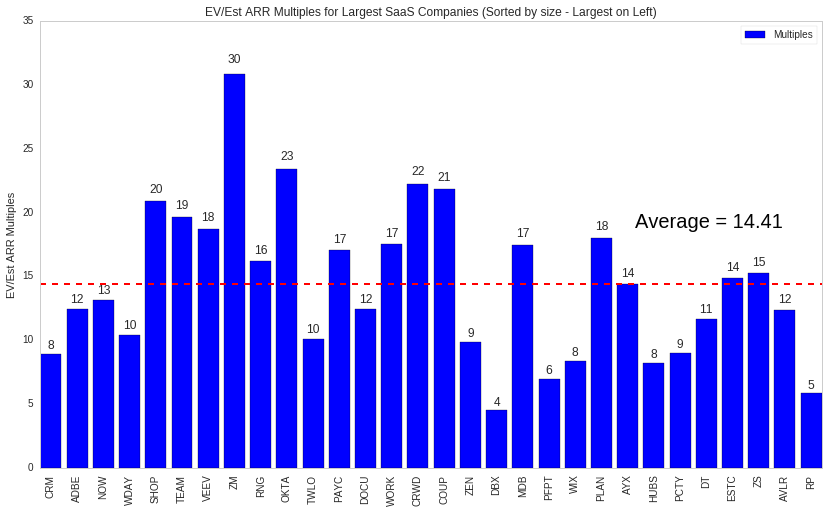

In [38]:
# bar chart code
# create the bar chart
N = len(bar_df)
mult = bar_df.values  #.tolist()
ind = np.arange(N)
fig, ax = plt.subplots()
mults = ax.bar(ind,mult,color='b',align="center")  
ax.set_ylabel('EV/Est ARR Multiples')
ax.set_title("EV/Est ARR Multiples for Largest SaaS Companies (Sorted by size - Largest on Left)")

width = 0.45
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(bar_df.index.values)

#ax = result_sorted.plot(kind='bar',x=result_sorted.index,title="EV-TTM Sales Multiples", use_index=True)
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height), ha='center', va='bottom')
autolabel(mults)
ax.legend(['Multiples'],loc='best')
ax.grid(False)
plt.xticks(ind, (bar_df.index.values),rotation='vertical')
plt.axhline(z_mean, color='r', linestyle='dashed', linewidth=2)
#plt.axis('tight') #scaled square
plt.autoscale(enable=True, axis='both', tight=None)
ax.text(0.95, 0.55, str('Average = ')+ str('{:.2f}').format(z_mean),
        horizontalalignment='right',
        verticalalignment='center',
        fontsize=20, color='black',
        transform=ax.transAxes)
#plt.margins(0.1,0)

fig = plt.figure(figsize=(8,6))
plt.show()